# L1: Analyzing Customer Spending Habits

Created by Machine Learning Department, NUS Fintech Society

In this lab, you will perform some basic data analysis on the credit card dataset to get some glances of the customer spending habits. The dataset contains information about the usage behavior of about 9000 active credit card holders. The file is at a customer level with 18 behavioral variables. Your goal is to understand the dataset by performing processing techniques you learn in the week 3 training session.

This analysis is required to develop a customer segmentation to define a proper marketing strategy. Following is the meaning of each column in the dataset:

* `CUST_ID`: Identification of Credit Card holder (Categorical)
* `BALANCE`: Balance amount left in their account to make purchases
* `BALANCE_FREQUENCY`: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* `PURCHASES`: Amount of purchases made from account
* `ONEOFF_PURCHASES`: Maximum purchase amount done in one-go
* `INSTALLMENTS_PURCHASES`: Amount of purchase done in installment
* `CASH_ADVANCE`: Cash in advance given by the user
* `PURCHASES_FREQUENCY`: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* `ONEOFF_PURCHASES_FREQUENCY`: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* `PURCHASES_INSTALLMENTS_FREQUENCY`: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* `CASH_ADVANCE_FREQUENCY`: How frequently the cash in advance being paid
* `CASH_ADVANCE_TRX`: Number of Transactions made with "Cash in Advanced"
* `PURCHASES_TRX`: Number of purchase transactions made
* `CREDIT_LIMIT`: Limit of Credit Card for user
* `PAYMENTS`: Amount of Payment done by user
* `MINIMUM_PAYMENTS`: Minimum amount of payments made by user
* `PRC_FULL_PAYMENT`: Percent of full payment paid by user
* `TENURE`: Tenure of credit card service for user

In [1]:
# Download the dataset from the repository (please run this first without any modification)
!wget -N https://raw.githubusercontent.com/oadultradeepfield/nus-fintech-society-ml-training-ay24-25-sem1/main/week3/data/credit_card.csv

--2024-08-24 16:14:17--  https://raw.githubusercontent.com/oadultradeepfield/nus-fintech-society-ml-training-ay24-25-sem1/main/week3/data/credit_card.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 902879 (882K) [text/plain]
Saving to: ‘credit_card.csv’

credit_card.csv     100%[===================>] 881.72K  5.42MB/s    in 0.2s    

Last-modified header missing -- time-stamps turned off.
2024-08-24 16:14:17 (5.42 MB/s) - ‘credit_card.csv’ saved [902879/902879]



# Lab Tasks and Questions

## Loading the Data and Initial Exploration

### Instructions:
* Load the dataset into a Pandas DataFrame.
* Display the first few rows to get an initial look at the data.

### Q1: What is maximum amount of purchases done in one-go for the customer with an identification number of C10004? (Answer this in Google Form)

In [2]:
# These are the libraries you will use in this labb
import pandas as pd
import seaborn as sns

In [3]:
# Load the dataset from the downloaded file
df = pd.read_csv('credit_card.csv')

In [4]:
# Display the first five rows of the dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Understanding the Dataset Structure

### Instructions:

* Use `df.info()` to get an overview of the dataset's structure.
* Use `df.describe()` to generate summary statistics for the numerical columns.

### Q2: How many rows and columns does the dataset have?  (Answer this in Google Form)

In [5]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Q3: What is the maximum amount of cash in advance ever given by a user?  (Answer this in Google Form)

In [6]:
# Generate summary statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Slicing and Sorting Data

### Instructions:

* Select only the columns `CUST_ID` and `PURCHASES_TRX`.
* Sort the data by `PURCHASES_TRX` to identify the highest numbers of purchases.

### Q4: What are the top 3 highest numbers of purchases? Provide the details for these transactions, including the credit card identification number and the numbers of purchases.  (Answer this in Google Form)

In [7]:
# Select the specified columns
df_selected = df.loc[:, ['CUST_ID', 'PURCHASES_TRX']]

# Sort the data by 'transaction_amount' in descending order
df_sorted = df_selected.sort_values(by='PURCHASES_TRX', ascending=False)
df_sorted.head()

,CUST_ID,PURCHASES_TRX
1256,C11300,358
3181,C13272,347
3937,C14048,344
4784,C14918,309
4515,C14640,308


## Data Visualization with Seaborn

### Instructions:

* Create a histogram to visualize the distribution of the amount of payment done by users
* Create a scatter plot to explore the relationship between amount of payment done by users ($Y$) and their credit limits ($X$)

### Q5: Based on the observations on scatter plot, what can you infer about the relationship between a customer's credit limit and their spending behavior?  (Answer this in Google Form)

<Axes: xlabel='PAYMENTS', ylabel='Count'>

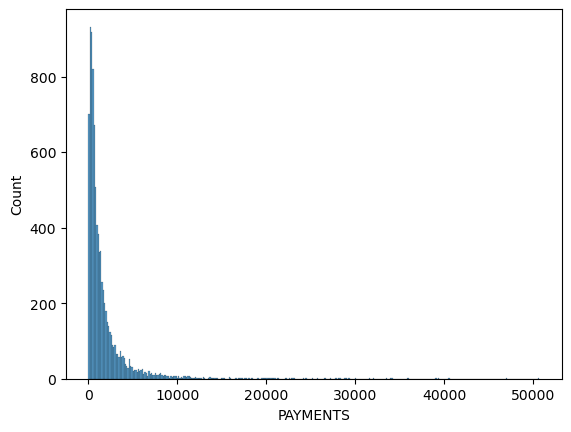

In [8]:
# Histogram of the amount of payment done by users
sns.histplot(df['PAYMENTS'])

<Axes: xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

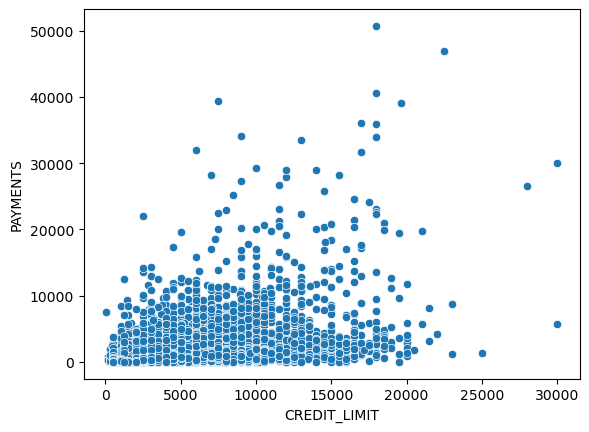

In [9]:
# Scatter plot for amount of payment done by users vs. their credit limits
sns.scatterplot(x=df['CREDIT_LIMIT'], y=df['PAYMENTS'])

<h2 style="text-align: center;"><hr>END OF THE LAB<hr></h2>